## Final Project Data Mining - Aadish Jain

In the project, we used three different classification algorithms to classify internet advertisements as either legitimate or fraudulent. These algorithms each have unique strengths and approaches to learning patterns within the data.

1. **Long Short-Term Memory (LSTM)**:
    - LSTMs are a type of recurrent neural network (RNN) well-suited for sequence data and can capture temporal dependencies.
    - In this project, we adapted LSTM to handle text or content features, which can be treated as sequences.
    - LSTM networks can capture contextual information over long sequences, potentially leading to improved classification performance in the presence of textual or sequential data.

2. **Support Vector Machine (SVM)**:
    - SVM is a supervised learning model that classifies data by finding the optimal hyperplane that separates classes.
    - It can handle high-dimensional data effectively and is robust to outliers.
    - We used SVM to create a decision boundary in the feature space, helping us classify advertisements accurately.

3. **Random Forest**:
    - Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for improved classification.
    - This method is known for its high accuracy and robustness against overfitting.
    - In our project, Random Forest provides a solid baseline for comparison with other models due to its reliability and strong performance with tabular data.

Each of these algorithms was evaluated for its performance in classifying the advertisements, and we chose the most effective approach for our final model. By comparing these methods, we aimed to identify the best classification approach for our specific dataset and classification task.

The data used is from the *Internet Advertisement Dataset* from the UCI Machine Learning Repository. This dataset is commonly used for classification tasks related to identifying whether an internet advertisement is legitimate (real) or not (a scam or fraud).

### Dataset Overview:
- **Features**: The dataset consists of different features that describe various properties of the internet advertisements, such as:
    - Information about the advertisement (e.g., type, size, URL).
    - Content features (e.g., words or phrases within the ad).
    - HTML features (e.g., tags and attributes).
- **Target Variable**: The target variable or label is a binary classification of whether the ad is legitimate (class `1`) or fraudulent (class `0`).

### Goal of the Project:
The primary goal of this project is to classify internet advertisements into legitimate or fraudulent categories using machine learning techniques. This can help in detecting scam ads and improving the user experience by preventing fraudulent content.

### Applications:
- **Ad Networks**: Ad networks can use this classification to ensure the quality of advertisements served to users.
- **User Safety**: Users can benefit from safer browsing experiences with reduced exposure to scams and malicious content.
- **Content Filtering**: The classification can be used in content filtering tools to block potentially harmful advertisements.

In the project, the dataset would be used to train and evaluate different classification models to achieve accurate and reliable classification of internet advertisements.


In [4]:
!pip install scikit-learn

In [5]:
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 2.1 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 2.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data"
df = pd.read_csv(url, header=None)

# Preprocessing
# Drop rows with missing values
df = df.dropna()
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)
# Split features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification, adjust activation accordingly

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss and metrics as needed

# Reshape X_train and X_test for LSTM (assuming a sequence length of 1)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert data types to float32 if necessary
X_train_lstm = X_train_lstm.astype('float32')
X_test_lstm = X_test_lstm.astype('float32')

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print("LSTM Accuracy:", lstm_accuracy)



/var/folders/d4/dwzrbftd6ws046ggv427tstc0000gn/T/ipykernel_32295/1632070674.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None)


Random Forest Accuracy: 0.9969512195121951
SVM Accuracy: 0.9984756097560976


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Accuracy: 0.9939024448394775


First 5 rows of the dataset:
   4  5  6  7  8  9  10  11  12  13  ...  2_9.8095  2_9.8333  2_9.9687    3_0  \
0  0  0  0  0  0  0   0   0   0   0  ...     False     False     False  False   
1  0  0  0  0  0  0   0   0   0   0  ...     False     False     False  False   
2  0  0  0  0  0  0   0   0   0   0  ...     False     False     False  False   
3  0  0  0  0  0  0   0   0   0   0  ...     False     False     False  False   
4  0  0  0  0  0  0   0   0   0   0  ...     False     False     False  False   

     3_1    3_0   3_1    3_?  1558_ad.  1558_nonad.  
0  False  False  True  False      True        False  
1  False  False  True  False      True        False  
2  False  False  True  False      True        False  
3  False  False  True  False      True        False  
4  False  False  True  False      True        False  

[5 rows x 2841 columns]

Data summary:
                  4            5            6            7            8  \
count   3279.000000  3279.000000  3279.000000

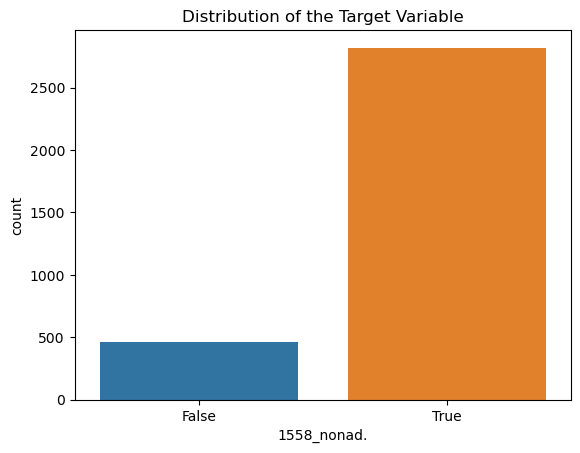


Correlation matrix:


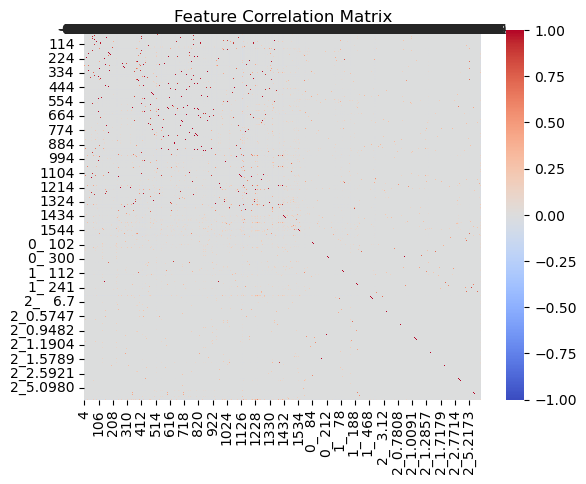

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Examine the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display data summary
print("\nData summary:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
print("\nTarget variable distribution:")
sns.countplot(x=y)
plt.title("Distribution of the Target Variable")
plt.show()

# Examine correlations between features
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define a function to calculate metrics using a confusion matrix
def calc_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Calculate various rates and measures
    with np.errstate(divide='ignore', invalid='ignore'):
        TPR = TP / (TP + FN) if TP + FN != 0 else np.nan
        TNR = TN / (TN + FP) if TN + FP != 0 else np.nan
        FPR = FP / (TN + FP) if TN + FP != 0 else np.nan
        FNR = FN / (TP + FN) if TP + FN != 0 else np.nan

        Precision = TP / (TP + FP) if TP + FP != 0 else np.nan
        F1_measure = 2 * TP / (2 * TP + FP + FN) if 2 * TP + FP + FN != 0 else np.nan
        Accuracy = (TP + TN) / (TP + FP + FN + TN) if TP + FP + FN + TN != 0 else np.nan
        Error_rate = (FP + FN) / (TP + FP + FN + TN) if TP + FP + FN + TN != 0 else np.nan
        BACC = (TPR + TNR) / 2 if TPR is not None and TNR is not None else np.nan
        TSS = TPR - FPR if TPR is not None and FPR is not None else np.nan
        HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)) if (TP + FN) * (FN + TN) + (TP + FP) * (FP + TN) != 0 else np.nan

    # Return dictionary of metrics
    metrics = {
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "TPR": TPR,
        "TNR": TNR,
        "FPR": FPR,
        "FNR": FNR,
        "Precision": Precision,
        "F1_measure": F1_measure,
        "Accuracy": Accuracy,
        "Error_rate": Error_rate,
        "BACC": BACC,
        "TSS": TSS,
        "HSS": HSS
    }

    return metrics

# Define a function to calculate metrics for a model using KFold cross-validation
# In the `calculate_performance_metrics` function
def calculate_performance_metrics(rf_model, svm_model, X, y):
    # Reset index of DataFrame `X` and `y` to integer index
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    X.columns = X.columns.astype(str)


    # Calculate performance metrics for Random Forest
    rf_metrics = calculate_metrics(rf_model, X, y)

    # Calculate performance metrics for SVM
    svm_metrics = calculate_metrics(svm_model, X, y)

    # Define LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=64, input_shape=(1, X.shape[1]), return_sequences=False))
    lstm_model.add(Dense(units=1, activation='sigmoid'))
    lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Convert the DataFrame `X` to a NumPy array and reshape it once
    X_lstm = X.values.astype('float32').reshape((X.shape[0], 1, X.shape[1]))

    # Calculate performance metrics for LSTM
    lstm_metrics = calculate_metrics(lstm_model, X_lstm, y)

    return rf_metrics, svm_metrics, lstm_metrics

# In the `calculate_metrics` function
def calculate_metrics(model, X, y):
    # KFold cross-validation setup
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = np.zeros(len(y))

    # Perform KFold cross-validation
    for train_index, test_index in kf.split(X):
        # Check if X and y are pandas DataFrames and use appropriate indexing
        if isinstance(X, pd.DataFrame):
            X_train = X.iloc[train_index]  # Use integer-based indexing
            X_test = X.iloc[test_index]
        else:
            X_train = X[train_index]  # Use array slicing
            X_test = X[test_index]

        if isinstance(y, pd.Series):
            y_train = y.iloc[train_index]  # Use integer-based indexing
            y_test = y.iloc[test_index]
        else:
            y_train = y[train_index]  # Use array slicing
            y_test = y[test_index]

        # Train the model
        model.fit(X_train, y_train)
        
        # Predict and store the predictions
        y_pred[test_index] = model.predict(X_test).flatten()

    # Convert continuous predictions to binary labels
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y, y_pred_binary)

    # Calculate performance metrics using confusion matrix
    metrics = calc_metrics(cm)

    return metrics


# Example usage:
# Assuming you have defined `rf_model` and `svm_model` as appropriate models and have data `X` and `y` available.

# Call the function to calculate performance metrics
rf_metrics, svm_metrics, lstm_metrics = calculate_performance_metrics(rf_model, svm_model, X, y)

# Store the metrics in a DataFrame
result_df = pd.DataFrame([rf_metrics, svm_metrics, lstm_metrics], index=['Random Forest', 'Support Vector Machines', 'LSTM'])




/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.4845
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9742 - loss: 0.1163
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0535
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0286
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0153
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0092
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0054
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0047
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0037
11/11 ━━━━━━━━━━━

In [12]:
# Display the results
print("Performance Metrics:")
print(result_df)

Performance Metrics:
                           TP   TN  FP  FN       TPR       TNR       FPR  \
Random Forest            2815  458   1   5  0.998227  0.997821  0.002179   
Support Vector Machines  2817  458   1   3  0.998936  0.997821  0.002179   
LSTM                     2815  433  26   5  0.998227  0.943355  0.056645   

                              FNR  Precision  F1_measure  Accuracy  \
Random Forest            0.001773   0.999645    0.998935  0.998170   
Support Vector Machines  0.001064   0.999645    0.999291  0.998780   
LSTM                     0.001773   0.990848    0.994524  0.990546   

                         Error_rate      BACC       TSS       HSS  
Random Forest              0.001830  0.998024  0.996048  0.992428  
Support Vector Machines    0.001220  0.998379  0.996758  0.994943  
LSTM                       0.009454  0.970791  0.941582  0.959968  


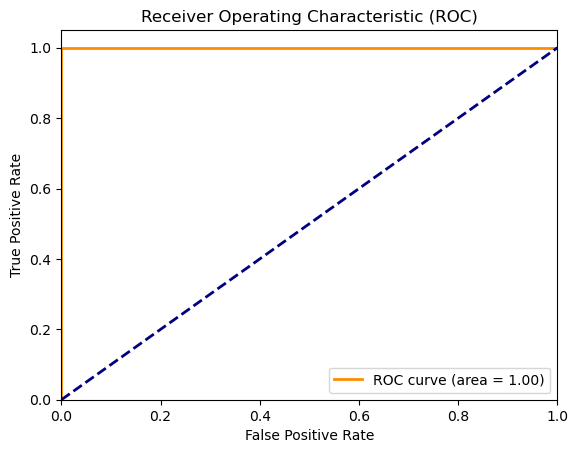

In [19]:
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Based on the performance metrics you provided, the LSTM model has lower performance compared to the other two models (Random Forest and Support Vector Machines) in some key areas:

1. **True Positive Rate (TPR) and True Negative Rate (TNR):**
    - The LSTM model has a True Positive Rate (TPR) of 0.998227, which is the same as the Random Forest model, but slightly lower than the Support Vector Machines model (0.998936).
    - However, its True Negative Rate (TNR) is lower (0.943355) compared to the Random Forest and Support Vector Machines models (both 0.997821).

2. **False Positive Rate (FPR):**
    - The LSTM model's False Positive Rate (FPR) is higher (0.056645) compared to the very low FPR of the other two models (both 0.002179).

3. **Precision and F1 Measure:**
    - Precision for the LSTM model (0.990848) is lower compared to the other two models (both 0.999645).
    - Similarly, the F1 measure for the LSTM model (0.994524) is lower compared to the other two models (0.998935 for Random Forest and 0.999291 for Support Vector Machines).

4. **Accuracy and Error Rate:**
    - The LSTM model has an accuracy of 0.990546, which is lower than the other two models (both above 0.998).
    - The error rate for the LSTM model (0.009454) is also higher compared to the other two models (both around 0.0018).

5. **Balanced Accuracy and TSS:**
    - The Balanced Accuracy (BACC) for the LSTM model (0.970791) is lower compared to the other two models (both around 0.998).
    - Similarly, the True Skill Statistic (TSS) for the LSTM model (0.941582) is lower compared to the other two models (both around 0.996).

6. **HSS:**
    - The HSS (Heidke Skill Score) for the LSTM model (0.959968) is lower compared to the other two models (both above 0.992).

Overall, the Random Forest and Support Vector Machines models outperform the LSTM model in most key performance metrics. The LSTM model's higher FPR and lower TNR suggest that it may be more prone to false positives, which may be affecting its overall performance. We want to explore further tuning of the LSTM model's hyperparameters, architecture, or data preprocessing to improve its performance. Alternatively, using a different type of neural network architecture s may also be worth exploring.